# Webscraping IMDB with python (using rpy2)

#### Load rpy2 package to use R from python

In [1]:
%reload_ext rpy2.ipython

#### Import relevant python libraries

In [2]:
import urllib3
from urllib.parse import urlencode
from IPython.display import Image
import requests
import json
from urllib.parse import urlencode

### Now let's say the code can only take the actor's name as an input

In [3]:
act = "Dustin Hoffman"
act = str(act.encode("utf-8"))

#### Okay perfect, now let python extract the actor's id from the IMDB database search query 

In [4]:
r = requests.get('http://www.imdb.com/xml/find?json=1&nr=1&nm=on&q='+act)
data=r.json()


try:
    act_id = data['name_exact'][0]['id']
except:
    act_id = data['name_popular'][0]['id']
    
    
dh=act_id
dh

'nm0000163'

#### We obviously need to compare him to the Robert De Niro

In [5]:
act = "Robert De Niro"
act = str(act.encode("utf-8"))


r = requests.get('http://www.imdb.com/xml/find?json=1&nr=1&nm=on&q='+act)
data=r.json()


try:
    act_id = data['name_exact'][0]['id']
except:
    act_id = data['name_popular'][0]['id']
    
    
rdn=act_id
rdn

'nm0000134'

#### Let R take care of the analysis we need, please URL below for details on R methodology https://github.com/saleemaldajani/data/blob/master/sdajani03102017webscrapingimdbwithr.ipynb 

In [6]:
%%R  -i dh rdn 


library(xml2)
library(rvest)
library(selectr)
library('dplyr')


baseurl="http://www.imdb.com/name/"
dh_link=paste(baseurl,dh,'/',sep='')
rdn_link=paste(baseurl,rdn,'/',sep='')



#Open a new session linking to Hoffman's page and read the links to his filmography


session <- html_session(dh_link)
content <- read_html(session)





hoffman_links <- html_nodes(content,"#filmo-head-actor+ .filmo-category-section b a" )
hoffman_links <- html_attr(hoffman_links, "href")



#Create an empty vector of Hoffman's ratings
number_hoffman <- length(hoffman_links)
hoffman_ratings<- c()

#Loop over the links and extract the ratings vector
for(i in 1:number_hoffman){
  session <- session %>% jump_to(hoffman_links[i])
  movie <- read_html(session)
  rating <- html_nodes(movie,".ratingValue strong span")
  if (length(rating)>0){
    textrating <- html_text(rating)
    hoffman_ratings[i] <- as.numeric(textrating)
  }
}

print(hoffman_links)
print(hoffman_ratings)



#Open a new session linking to De Niro's page and read the links to his filmography
link2=paste(baseurl,rdn,sep='')

session2 <- html_session(link2)
content2 <- read_html(session2)
deniro_links <- content2 %>% html_nodes("#filmo-head-actor+ .filmo-category-section b a")
deniro_links <- deniro_links %>% html_attr("href")

#Create an empty vector of DeNiro's ratings
number_deniro <- length(deniro_links)
deniro_ratings<- c()
print
#Loop over the links and extract the ratings vector
for(j in 1:number_deniro){
  session2 <- session2 %>% jump_to(deniro_links[j])
  movie2 <- read_html(session2)
  rating2 <- html_nodes(movie2,".ratingValue strong span")
  if (length(rating2)>0){
    textrating2 <- html_text(rating2)
    deniro_ratings[j] <- as.numeric(textrating2)
  }
}
print(deniro_ratings)

# Kernel Density Estimation

library(tidyverse)

hoffman <- as.data.frame(hoffman_ratings)
deniro <- as.data.frame(deniro_ratings)

kernel=ggplot(hoffman, aes(hoffman_ratings))+
  geom_density(data=hoffman, aes(hoffman_ratings,..density..),color="red")+
  geom_density(data=deniro, aes(deniro_ratings,..density..),color="blue")+
  xlab("Kernel Density Hoffman (Red) De Niro (Blue)" )+
  ylab("")
ggsave("~/Desktop/kernel.png")

# CDF
cdf=ggplot(hoffman, aes(hoffman_ratings))+
  stat_ecdf(data=hoffman, aes(hoffman_ratings),color="red")+
  stat_ecdf(data=deniro, aes(deniro_ratings),color="blue")+
  xlab("CDF Hoffman (Red) De Niro (Blue)")
ggsave("~/Desktop/cdf.png")





//anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
//anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
//anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)
//anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr

  warnings.warn(x, RRuntimeWarning)
//anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Conflicts with tidy packages ---------------------------------------------------


 [1] "/title/tt5536736/?ref_=nm_flmg_act_1" 
 [2] "/title/tt5057130/?ref_=nm_flmg_act_2" 
 [3] "/title/tt2267968/?ref_=nm_flmg_act_3" 
 [4] "/title/tt5513770/?ref_=nm_flmg_act_4" 
 [5] "/title/tt3083008/?ref_=nm_flmg_act_5" 
 [6] "/title/tt3205394/?ref_=nm_flmg_act_6" 
 [7] "/title/tt3203616/?ref_=nm_flmg_act_7" 
 [8] "/title/tt3302706/?ref_=nm_flmg_act_8" 
 [9] "/title/tt2883512/?ref_=nm_flmg_act_9" 
[10] "/title/tt5241256/?ref_=nm_flmg_act_10"
[11] "/title/tt1578887/?ref_=nm_flmg_act_11"
[12] "/title/tt1980162/?ref_=nm_flmg_act_12"
[13] "/title/tt1302011/?ref_=nm_flmg_act_13"
[14] "/title/tt0970866/?ref_=nm_flmg_act_14"
[15] "/title/tt1702433/?ref_=nm_flmg_act_15"
[16] "/title/tt1423894/?ref_=nm_flmg_act_16"
[17] "/title/tt0420238/?ref_=nm_flmg_act_17"
[18] "/title/tt1287845/?ref_=nm_flmg_act_18"
[19] "/title/tt1046947/?ref_=nm_flmg_act_19"
[20] "/title/tt1470016/?ref_=nm_flmg_act_20"
[21] "/title/tt0441773/?ref_=nm_flmg_act_21"
[22] "/title/tt0457419/?ref_=nm_flmg_act_22"
[23] "/tit

#### Visualize your the plots that you generated from R

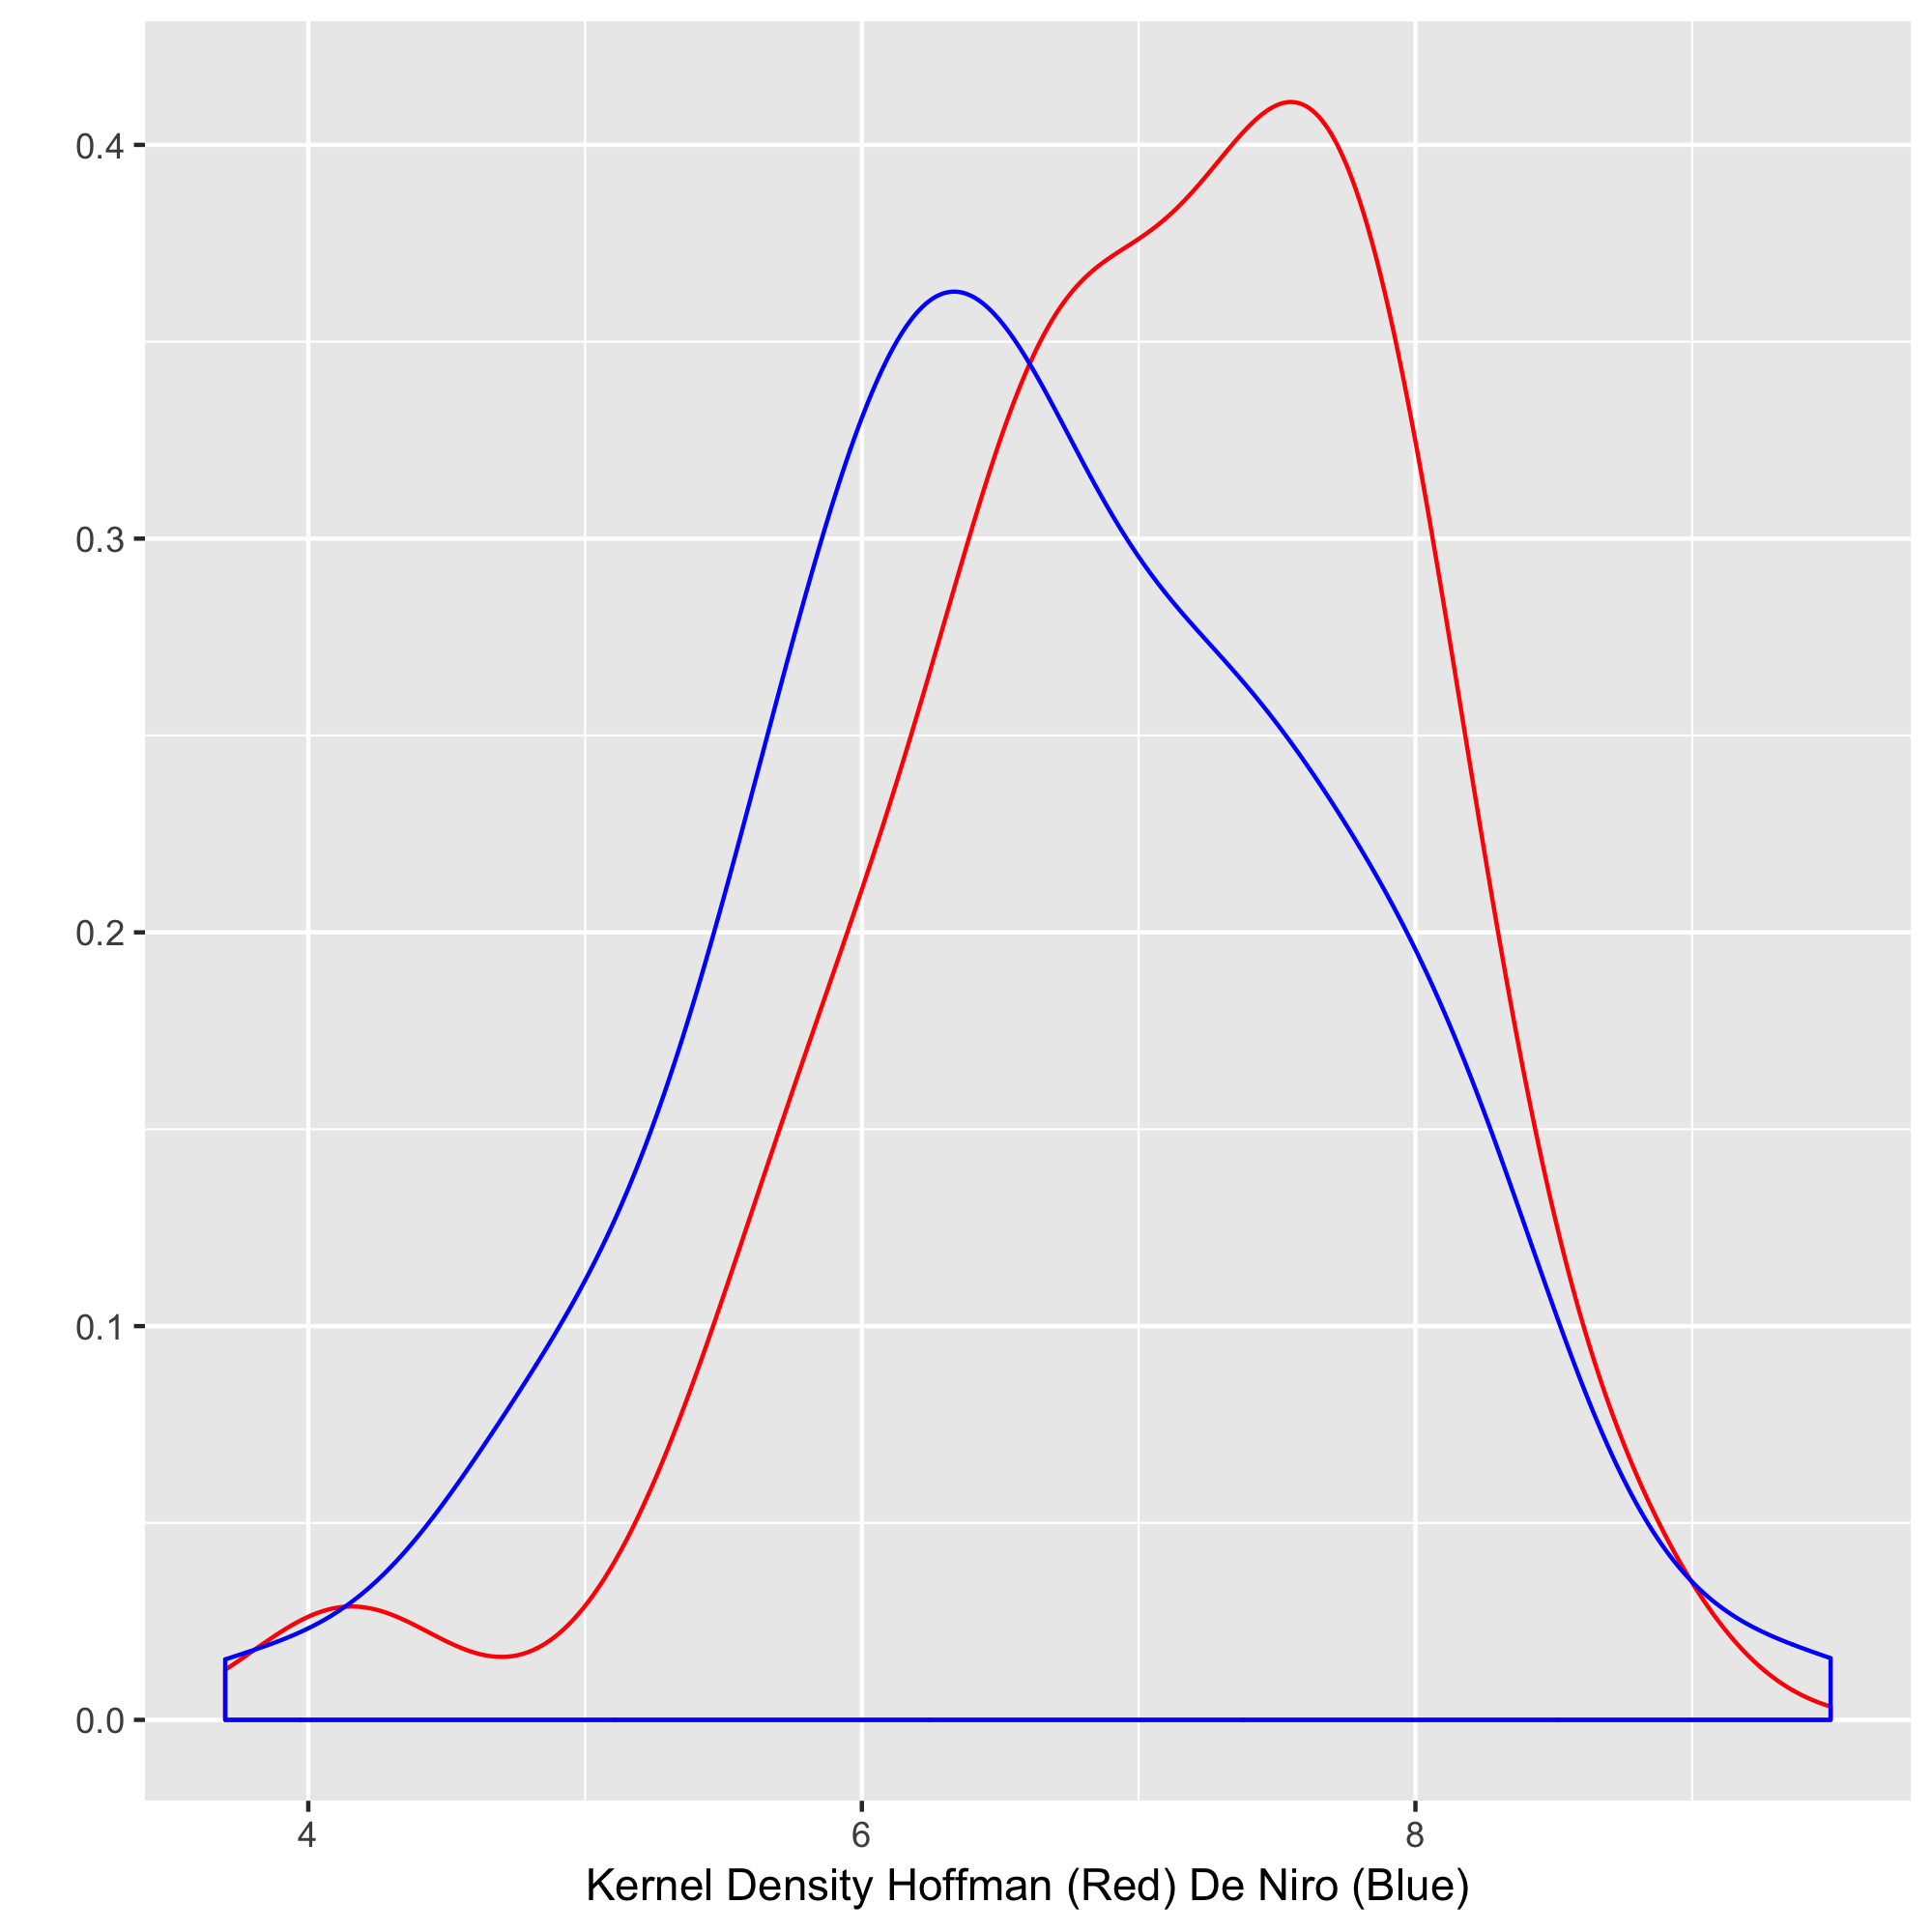

In [7]:
Image('/Users/sdajani/Desktop/kernel.png')

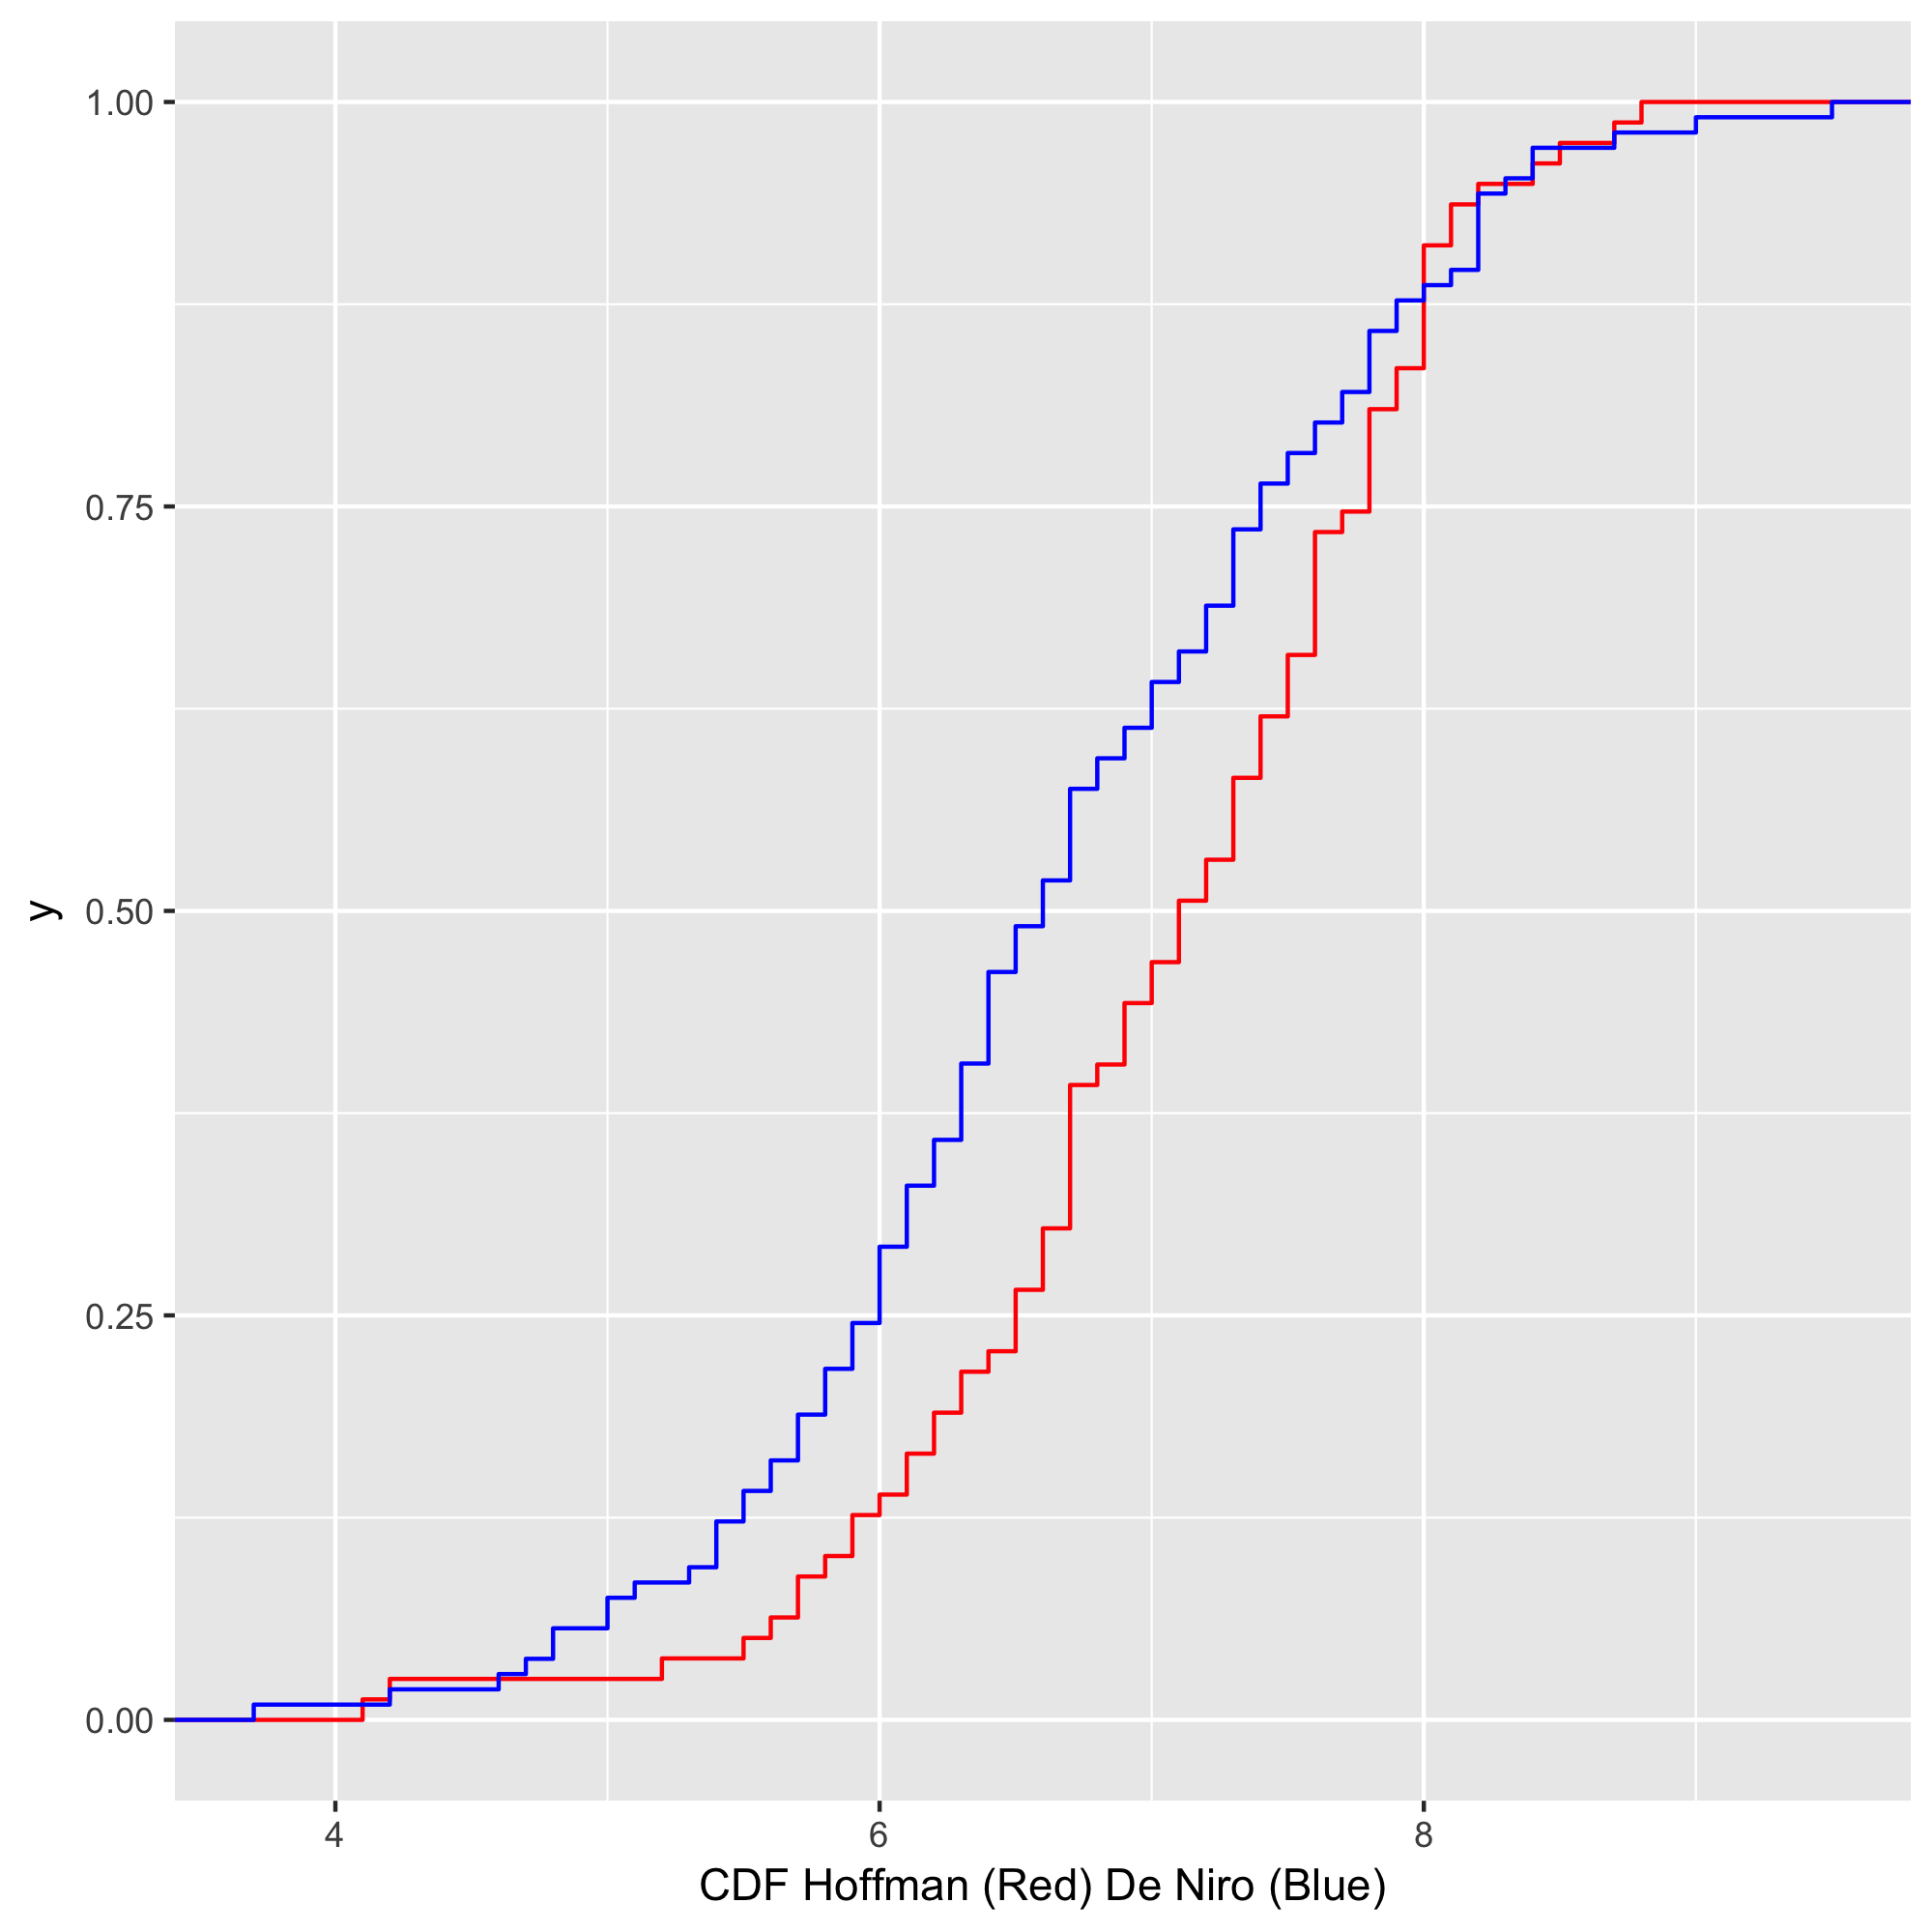

In [8]:
Image('/Users/sdajani/Desktop/cdf.png')